In [12]:
import os

import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import skimage.io

In [13]:
exp_name = 'mp3d_nodepth_perceptual_l1laplacian_inpaintGonly_freezemesh'
n_iter = 40000
split = 'mp3d_test'

synsin_dir = '/private/home/ronghanghu/workspace/synsin/results_mp3d/pred/'

In [14]:
def plot_results(results, image_name='', exp_name=''):
    plt.figure(figsize=(30, 5))

    plt.subplot(1, 6, 1)
    plt.imshow(results['orig_img_0'])
    plt.title('input view\n', fontsize=18)

    plt.subplot(1, 6, 2)
    plt.imshow(results['mesh_shape_0'][..., :3])
    plt.title('novel view mesh\n', fontsize=18)

    plt.subplot(1, 6, 3)
    plt.imshow(results['orig_img_1'])
    plt.title('ground-truth novel view\n', fontsize=18)

    plt.subplot(1, 6, 4)
    plt.imshow(results['rgba_1_rec'][..., :3])
    plt.title('novel view (ours w/o inpaint)\n', fontsize=18)

    plt.subplot(1, 6, 5)
    plt.imshow(results['rgb_1_inpaint'][..., :3])
    plt.title('novel view (ours)\n', fontsize=18)

    plt.subplot(1, 6, 6)
    plt.imshow(results['rgb_1_synsin'])
    plt.title('novel view (SynSin)\n', fontsize=18)

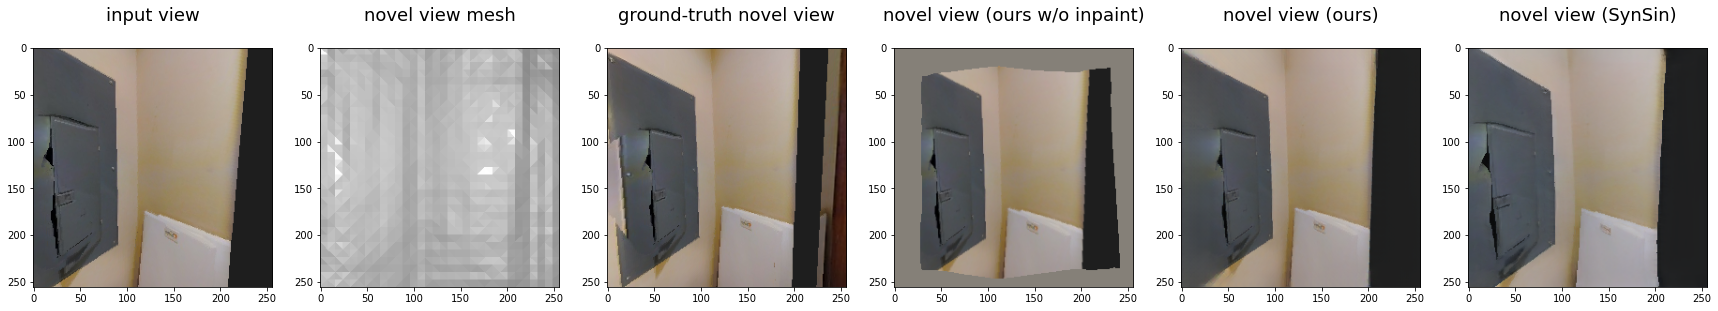

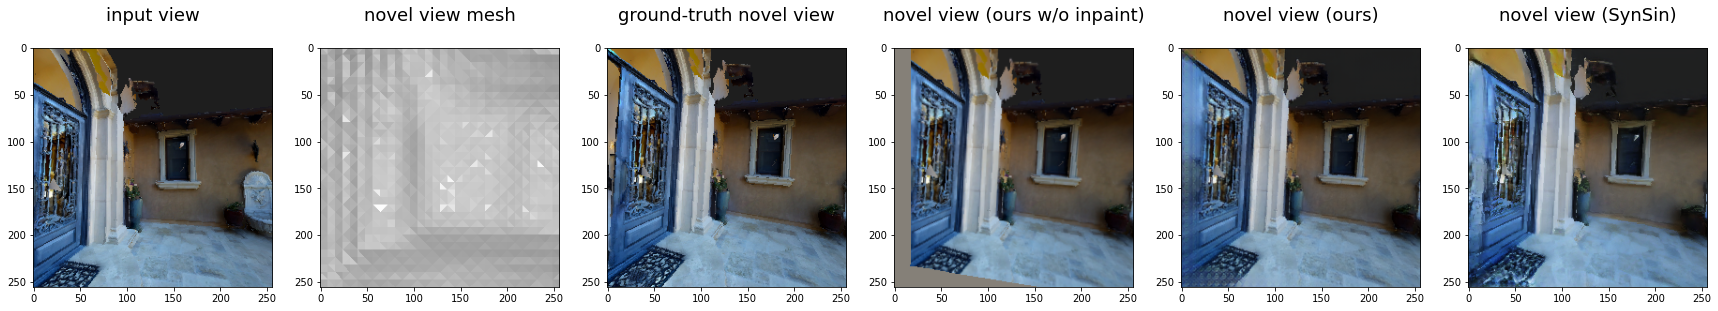

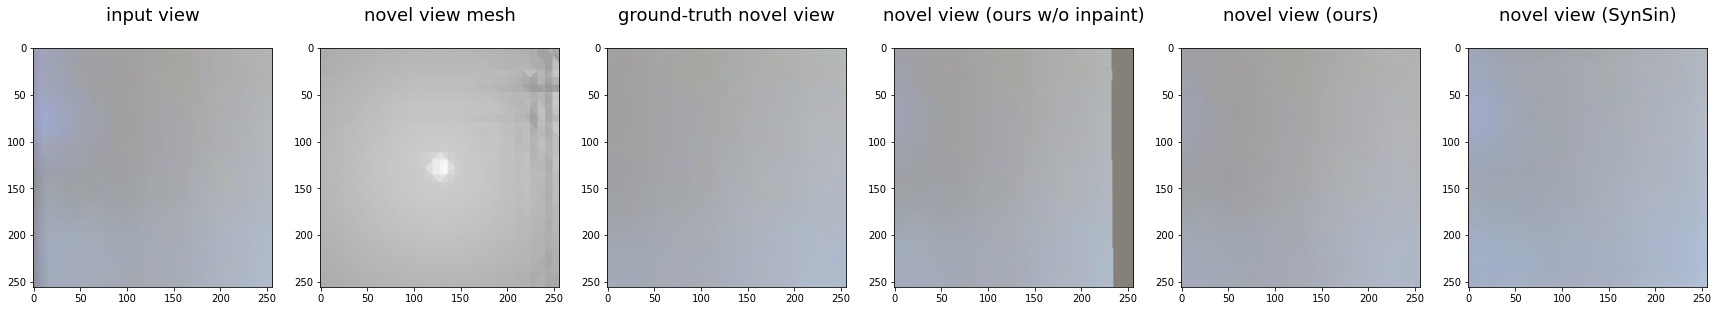

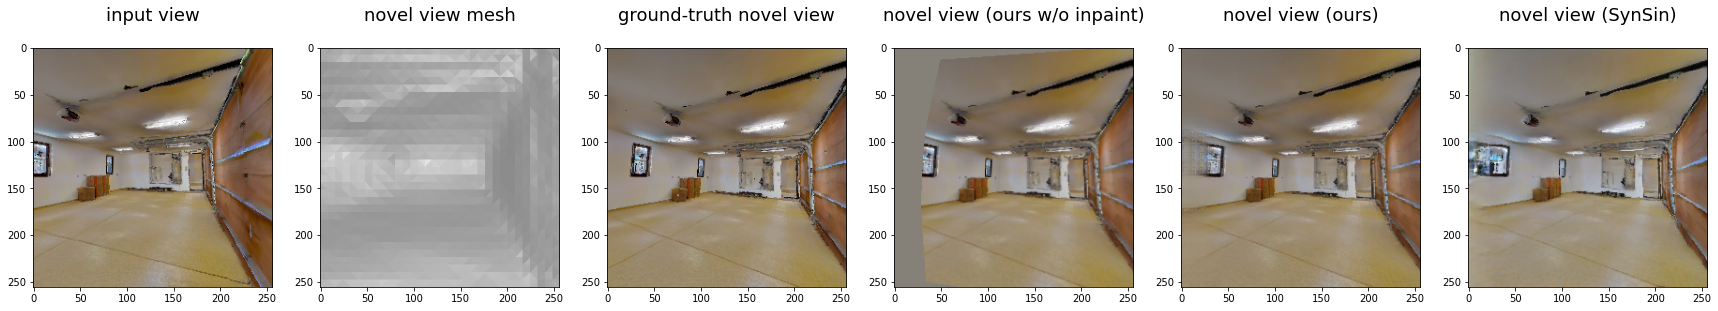

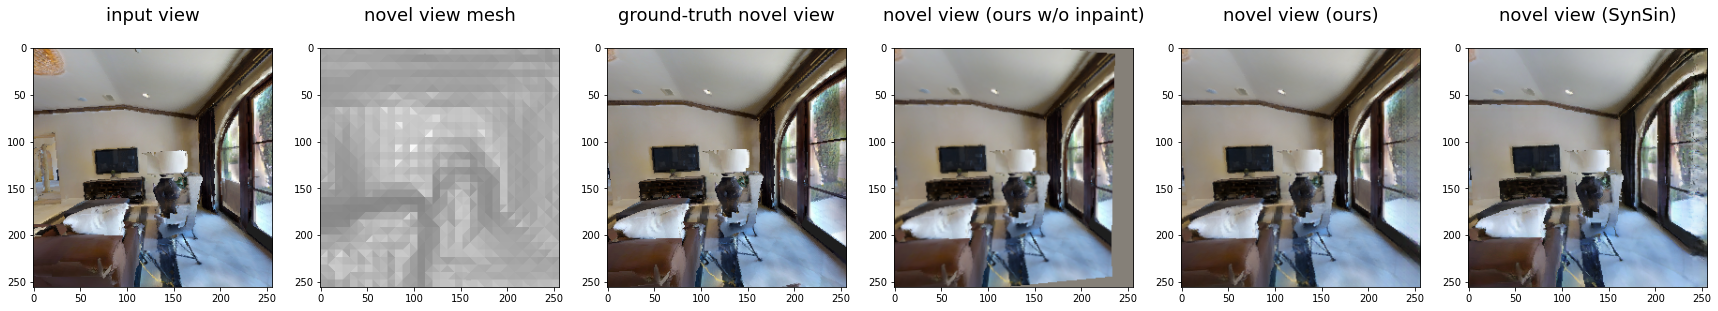

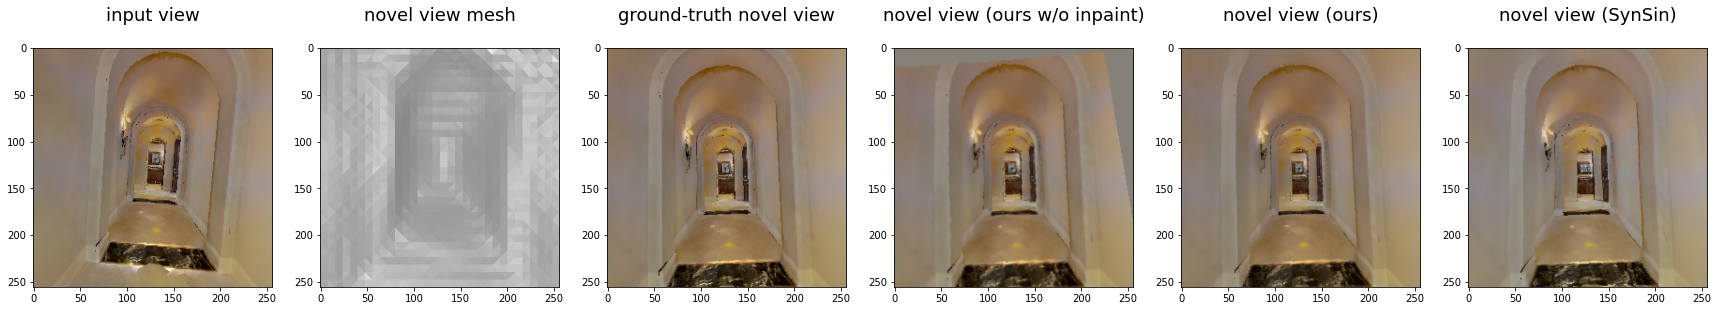

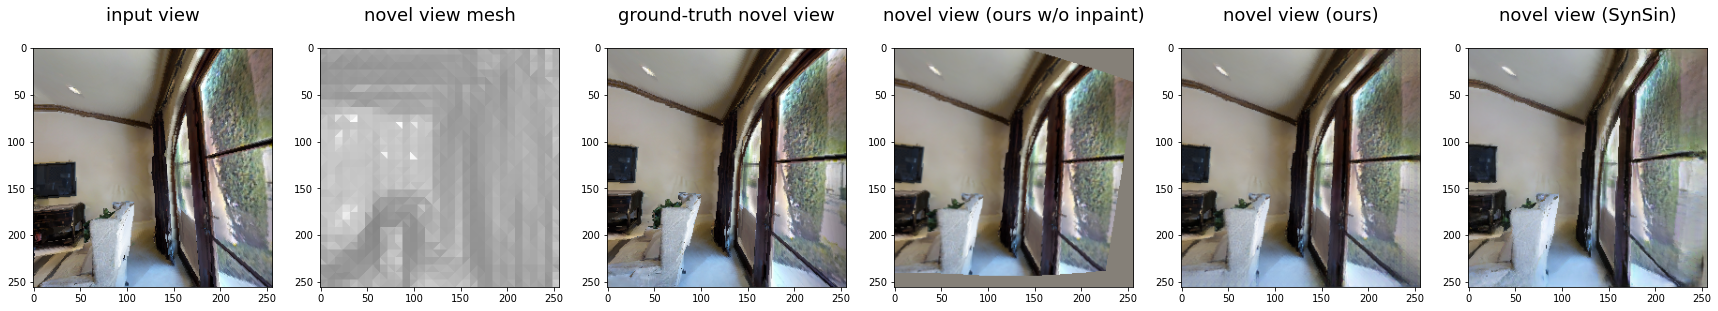

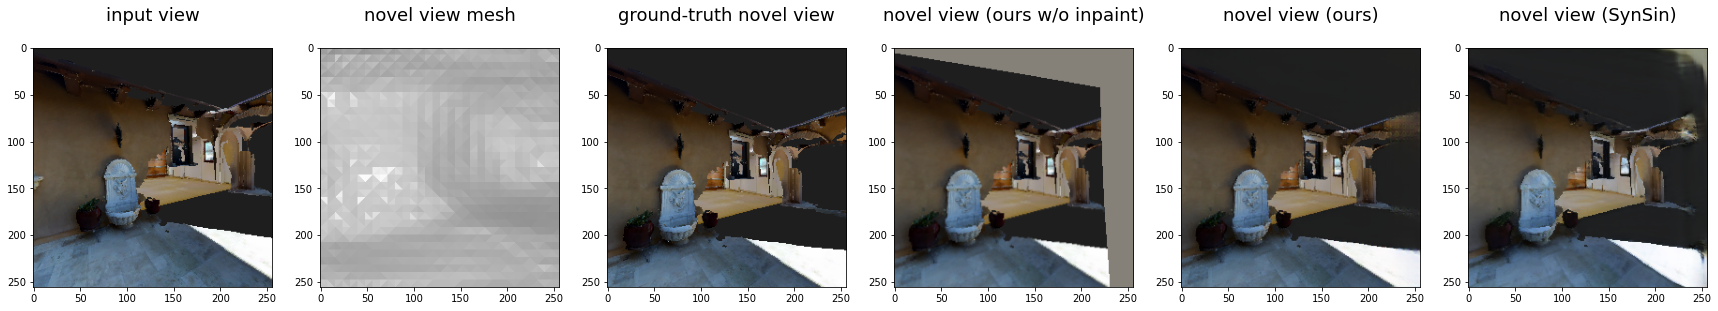

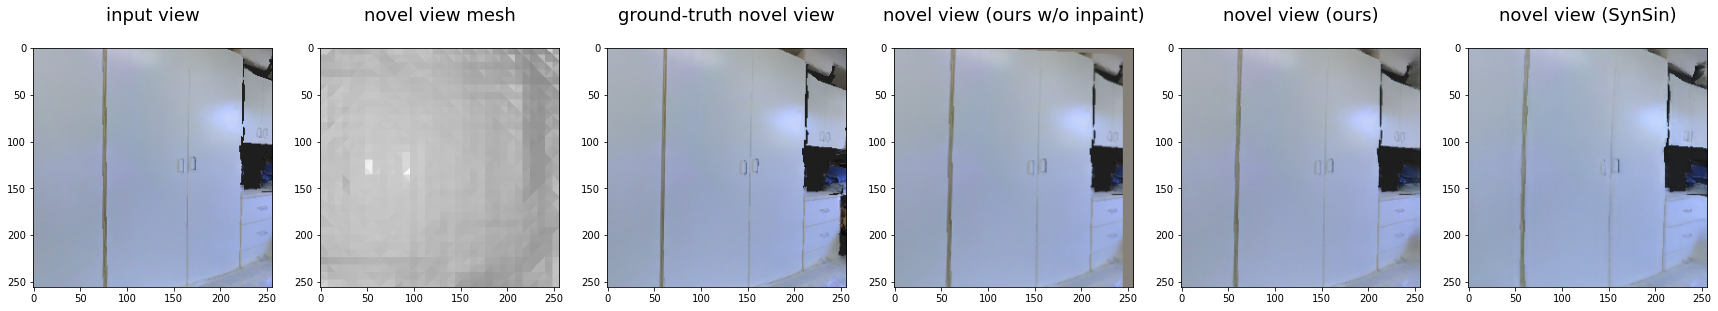

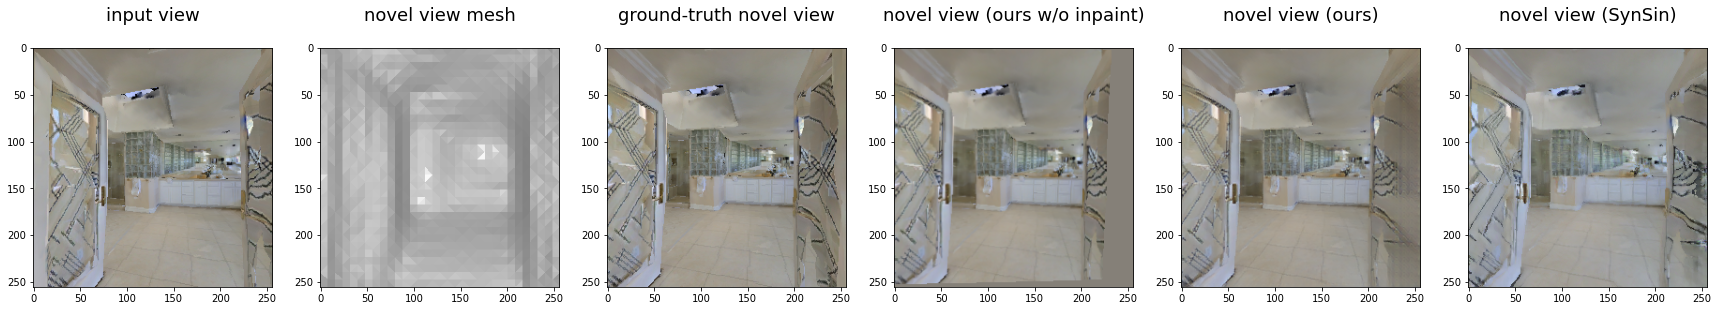

In [15]:
save_dir = f'/private/home/ronghanghu/workspace/mmf_nr/save/visualization_synsin_habitat/{exp_name}/{n_iter}/{split}'
result_files = sorted(glob(os.path.join(save_dir, '*.npz')))

for file in result_files[0:10]:
    d = np.load(file)
    idx = int(os.path.basename(file).split('_')[1])
    results = dict(d)
    results['rgb_1_synsin'] = skimage.io.imread(f"{synsin_dir}/{idx:08d}.png")
    plot_results(results, os.path.basename(file).split('.')[0], exp_name)
    d.close()